In [67]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [68]:
from sklearn.datasets import load_boston
boston = load_boston()
print boston.keys()
print boston.data.shape

['data', 'feature_names', 'DESCR', 'target']
(506L, 13L)


In [69]:
#features of Dataset
print boston.feature_names
print np.max(boston.target),np.min(boston.target),np.mean(boston.target)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
50.0 5.0 22.532806324110677


In [70]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [71]:
bos=pd.DataFrame(boston.data)

In [72]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [73]:
bos['PRICE'] = boston.target

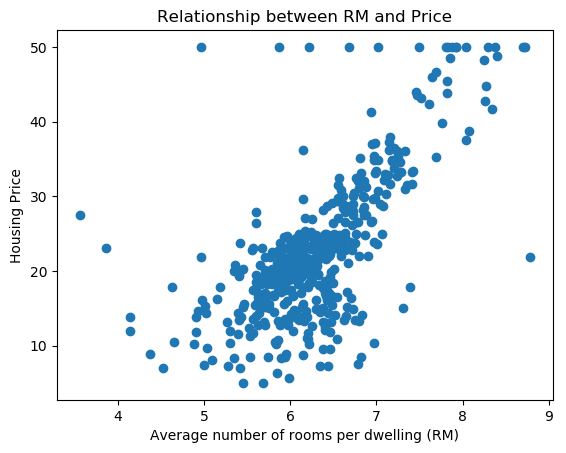

In [74]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show()


In [75]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, bos.PRICE, test_size = 0.25, random_state = 0)

lm.fit(X_train,Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

Text(0.5,1,u'Correlation between features')

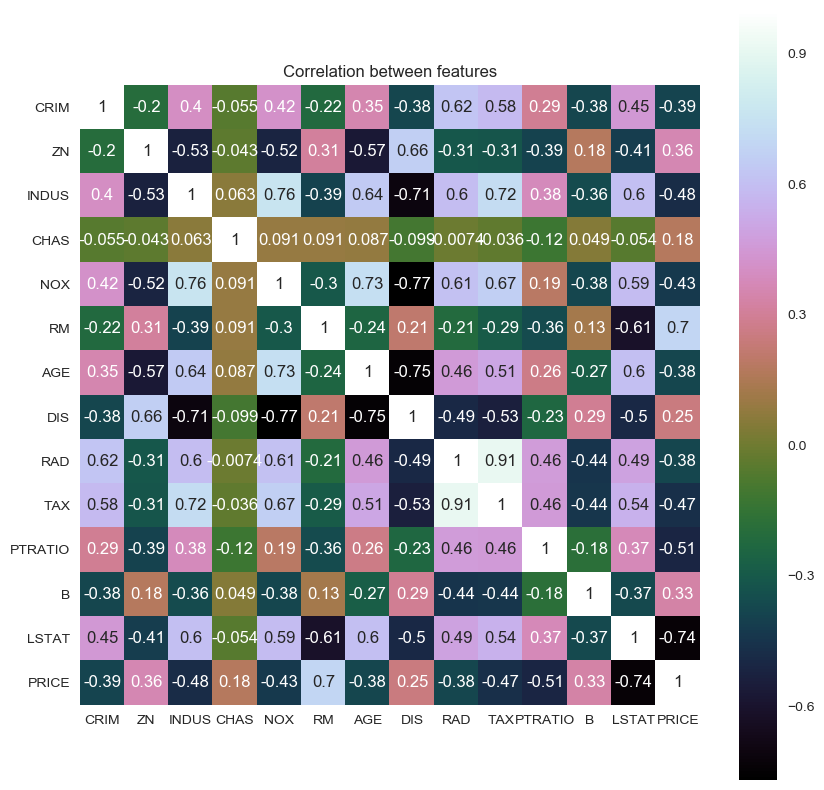

In [76]:
sns.set(font_scale=1)
corr=bos.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between features')

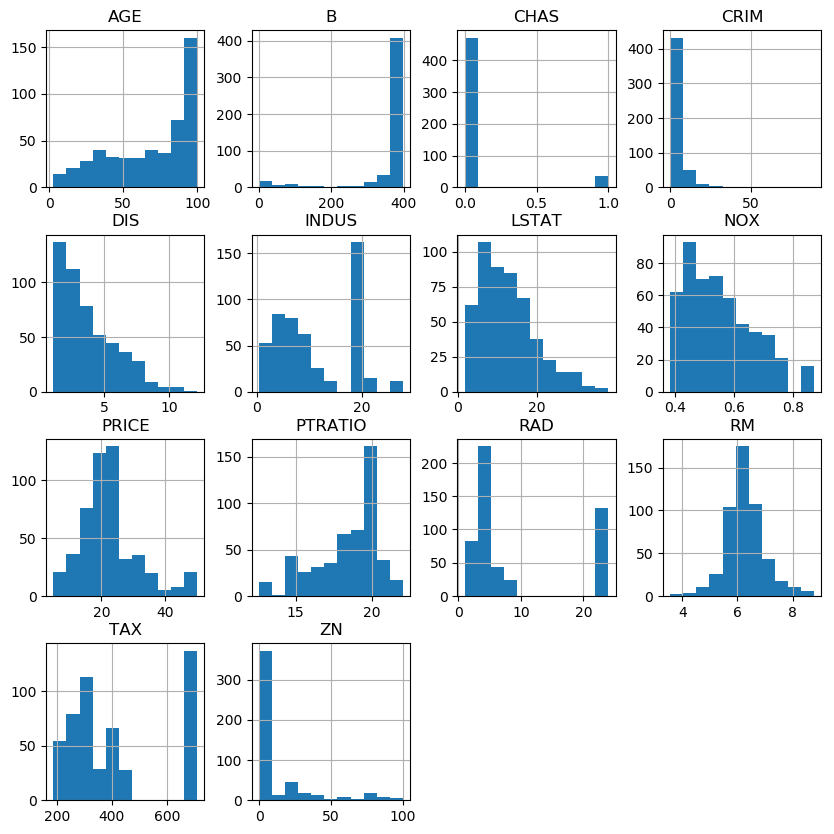

In [77]:
plt.style.use(style = 'default')
bos.hist(bins=11,figsize=(10,10),grid=True)
plt.show()

In [104]:
X = bos.drop('PRICE',axis =1)

In [90]:
#splitting the dataset into training set and test set
#Splitting 75%:25%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, bos.PRICE, test_size = 0.25, random_state = 0)
#Applying feature scaling to the dataset
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [92]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

print "Fit a model X_train, calculate MSE with y_train:"
print np.mean((y_train - pred_train) ** 2)
print "Fit a model X_train, calculate MSE with X_test, y_test:"
print np.mean((y_test - pred_test) ** 2)

Fit a model X_train, calculate MSE with y_train:
19.6426616728
Fit a model X_train, calculate MSE with X_test, y_test:
30.6066523489


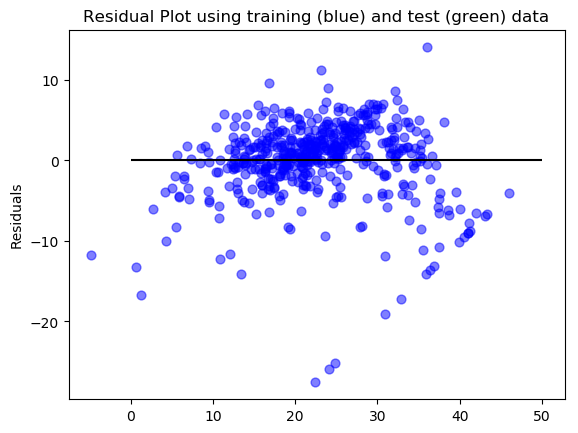

In [93]:
plt.scatter (lm.predict(X_train),lm.predict(X_train) - Y_train, c ='b',s =40,alpha = 0.5)
plt.scatter(lm.predict(X_test),lm.predict(X_test) - Y_test, c ='b',s =40,alpha = 0.5)
plt.hlines(y = 0,xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')
plt.show()